In [6]:
import tarfile
from astropy.io import fits
import os
import numpy as np
import matplotlib.pyplot as plt
# Specify the path to your tarball file
tarball_path = 'erass1cl_primary_v3.2.fits (1).tgz'

# Extract the tarball
with tarfile.open(tarball_path, 'r:gz') as tar:
    # Extract all files to a temporary directory
    temp_dir = 'Documents/GoGreen'
    tar.extractall(temp_dir)

# List the files in the temporary directory
files_in_temp_dir = os.listdir(temp_dir)

# Find the FITS file in the temporary directory
fits_file_name = [file for file in files_in_temp_dir if file.endswith('.fits')][0]
fits_file_path = os.path.join(temp_dir, fits_file_name)

# Open the FITS file
fits_file = fits.open(fits_file_path)

In [7]:


# Check the number of HDUs in the file
num_hdus = len(fits_file)
print(f'Number of HDUs: {num_hdus}')

# Print information about each HDU
for i in range(num_hdus):
    hdu_info = fits_file[i].header
    print(f'\nHDU {i} Info:')
    print(hdu_info)

# Access HDU0 
hdu0 = fits_file[0]
# Access HDU1
hdu1 = fits_file[1]



Number of HDUs: 2

HDU 0 Info:
SIMPLE  =                    T / Standard FITS format                           BITPIX  =                    8 / Character data                                 NAXIS   =                    1 / Text string                                    NAXIS1  =                17368 / Number of characters                           VOTMETA =                    T / Table metadata in VOTable format               EXTEND  =                    T / There are standard extensions                  COMMENT                                                                         COMMENT The data in this primary HDU consists of bytes which                    COMMENT comprise a VOTABLE document.                                            COMMENT The VOTable describes the metadata of the table contained               COMMENT in the following BINTABLE extension.                                    COMMENT Such a BINTABLE extension can be used on its own as a perfectly         COMMENT g

In [27]:
data_table = fits_file[1].data

#Print the values in the given column
names = data_table['CTS500']
print(names)

[ 48.2 189.5  30.3 ...  62.5  13.4 188. ]


In [95]:
data_table = fits_file[1].data

# Assuming "RA" and "Dec" are the column names for Right Ascension and Declination respectively
ras = data_table["RA"]
decs = data_table["Dec"]

# Print both RA and Dec coordinates along with their column numbers
#for i, (ra, dec) in enumerate(zip(ras, decs), start=1):
    #print(f"Column {i}: RA={ra}, Dec={dec}")

In [11]:
data_table = fits_file[1].data

#Extract data for the columns
match_names = data_table["MATCH_NAME"]
ras = data_table["RA"]
decs = data_table["Dec"]

# Create a boolean mask to filter rows based on the condition
mask = [True if "GOGREEN-GCLASS" in name else False for name in match_names]

# Iterate over the filtered rows using the boolean mask
for i, (name, ra, dec) in enumerate(zip(match_names[mask], ras[mask], decs[mask])):
    # Print the following information
    print("MATCH_NAME:", name)
    print("RA:", ra)
    print("Dec:", dec)

MATCH_NAME: ACTDR5_ACT-CL J0205.7-5829,GOGREEN-GCLASS_SPT0205,KIM-HIGHZ-LENSING_4,SPT2500D_SPT-CLJ0205-5829,XCLASS_3370
RA: 31.447910971701344
Dec: -58.483919215928594
MATCH_NAME: ACTDR5_ACT-CL J0546.6-5345,GOGREEN-GCLASS_SPT0546,KIM-HIGHZ-LENSING_44,MARDY3_MARDJ054638.8-534424,SPT2500D_SPT-CLJ0546-5345
RA: 86.65905614246141
Dec: -53.7580295917548
MATCH_NAME: ACTDR5_ACT-CL J2106.0-5844,GOGREEN-GCLASS_SPT2106,KIM-HIGHZ-LENSING_1,SPT2500D_SPT-CLJ2106-5844,XCLASS_24787
RA: 316.51733609532954
Dec: -58.74039463638295


In [12]:
# List of cluster names to search
cluster_names_to_search = ['COSMOS-125', 'COSMOS-221', 'COSMOS-28', 'COSMOS-63', 'SPT0205', 'SPT0546', 'SPT2106',
                            'SpARCS0035', 'SpARCS0335', 'SpARCS0034', 'SpARCS0036']

# Get the 'MATCH_NAME' values from the data table
names = data_table['NAME']

# Search for the specified cluster names using boolean indexing
found_clusters_mask = np.isin(names, cluster_names_to_search)

# Filter the data based on the boolean mask
found_clusters = names[found_clusters_mask]

# Print the found clusters
print(found_clusters)

[]


In [13]:
# Cluster names
cluster_names = data_table['NAME']

# Calculate the total number of clusters
total_clusters = len(cluster_names)

print(f'Total Number of Clusters: {total_clusters}')

Total Number of Clusters: 12247


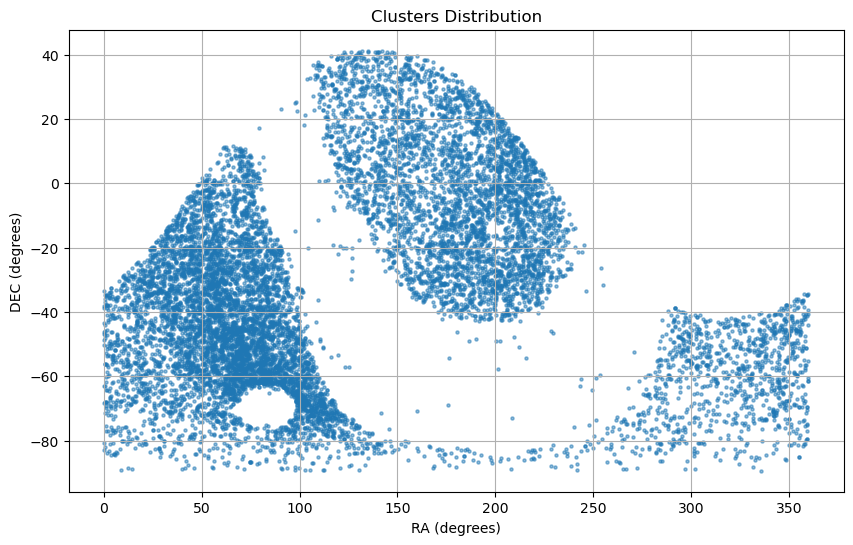

In [14]:
# Extract RA and DEC columns
ra = data_table['RA']
dec = data_table['DEC']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ra, dec, s=5, alpha=0.5)
plt.title('Clusters Distribution')
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
plt.grid(True)
plt.show() 

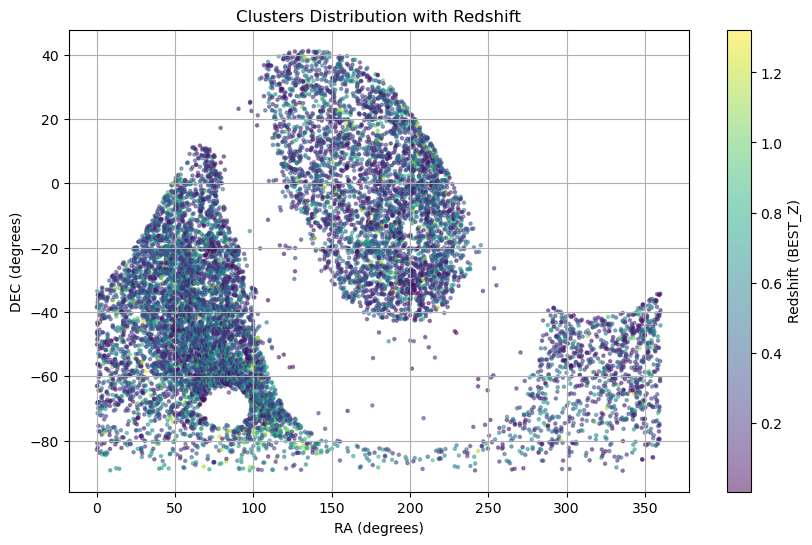

In [15]:
# Extract RA, DEC, and redshift columns
ra = data_table['RA']
dec = data_table['DEC']
redshift = data_table['BEST_Z']

# Create a scatter plot with redshift information
plt.figure(figsize=(10, 6))
scatter = plt.scatter(ra, dec, c=redshift, s=5, alpha=0.5, cmap='viridis') 
plt.title('Clusters Distribution with Redshift')
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
plt.colorbar(scatter, label='Redshift (BEST_Z)')
plt.grid(True)
plt.show()

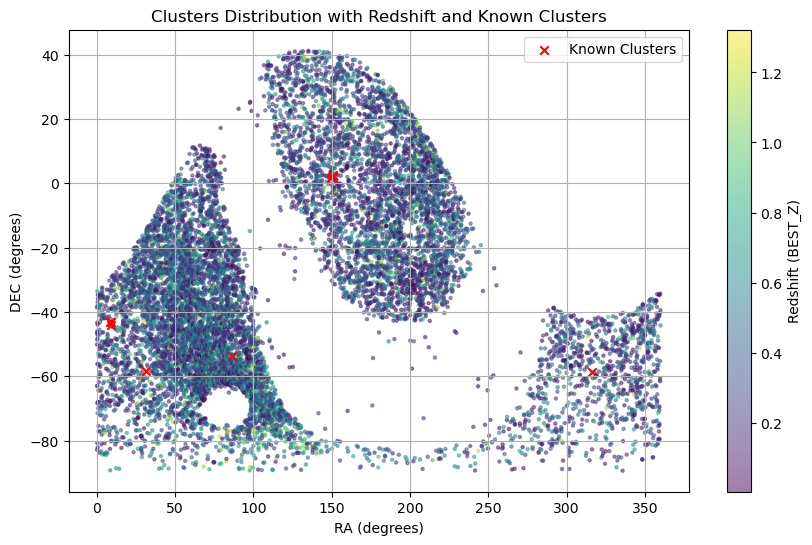

In [16]:
# Extract RA, DEC, and redshift columns
ra = data_table['RA']
dec = data_table['DEC']
redshift = data_table['BEST_Z']

# Specify RA and DEC coordinates for known clusters
known_clusters_ra = [150.6208, 150.562, 149.4692,150.359,31.451,86.6403,316.5191,8.957,8.67512,9.18756]  # Add your specific RA coordinates here
known_clusters_dec = [2.1675, 2.5031, 1.6685,1.9352,-58.4803,-53.761,-58.7411,-43.206604,-43.1315,-44.1805]  # Add your specific DEC coordinates here

# Create a scatter plot with redshift information
plt.figure(figsize=(10, 6))

# Scatter plot for all data points
scatter = plt.scatter(ra, dec, c=redshift, s=5, alpha=0.5, cmap='viridis') 

# Mark known clusters with red 'x' markers
plt.scatter(known_clusters_ra, known_clusters_dec, marker='x', color='red', label='Known Clusters')

plt.title('Clusters Distribution with Redshift and Known Clusters')
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')

# Add a legend to label the red 'x' markers
plt.legend()

plt.colorbar(scatter, label='Redshift (BEST_Z)')
plt.grid(True)
plt.show()

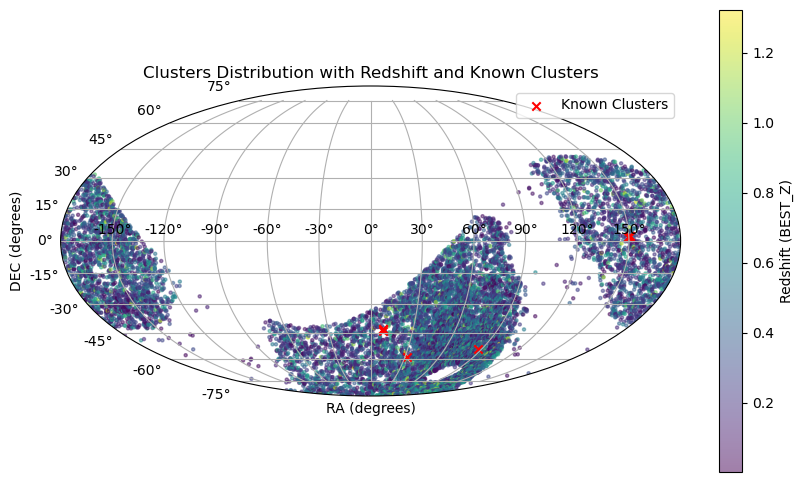

In [17]:
# Extract RA, DEC, and redshift columns
ra = data_table['RA']
dec = data_table['DEC']
redshift = data_table['BEST_Z']

# Calculate rotation angle 
rotation_angle = 180 - 180  

# Rotate RA coordinates
ra_mollweide = np.remainder(ra + 360 - 180 + rotation_angle, 360) - 180
ra_mollweide = np.radians(ra_mollweide)

# Specify RA and DEC coordinates for known clusters
known_clusters_ra = np.radians([150.6208, 150.562, 149.4692, 150.359, 31.451, 86.6403, 316.5191, 8.957, 8.67512, 9.18756])
known_clusters_dec = np.radians([2.1675, 2.5031, 1.6685, 1.9352, -58.4803, -53.761, -58.7411, -43.206604, -43.1315, -44.1805])

# Create a Mollweide scatter plot with redshift information
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="mollweide")
scatter = ax.scatter(ra_mollweide, np.radians(dec), c=redshift, s=5, alpha=0.5, cmap='viridis')
ax.set_title('Clusters Distribution with Redshift and Known Clusters')
ax.set_xlabel('RA (degrees)')
ax.set_ylabel('DEC (degrees)')

# Plot x's for known clusters
ax.scatter(known_clusters_ra, known_clusters_dec, marker='x', color='red', label='Known Clusters')

plt.colorbar(scatter, label='Redshift (BEST_Z)')
plt.grid(True)
plt.legend()
plt.savefig('mollweide_plot.png')
plt.show()


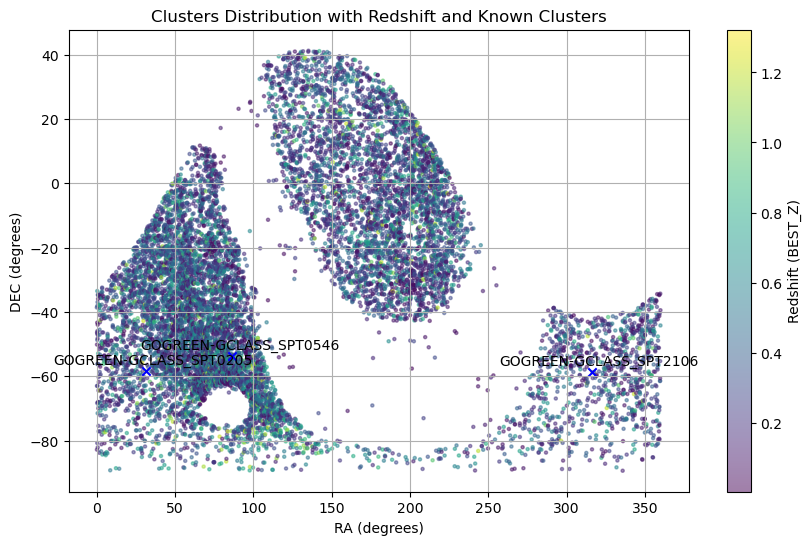

In [20]:
# Extract necessary columns
ra = data_table['RA']
dec = data_table['DEC']
redshift = data_table['BEST_Z']

# Create a scatter plot with redshift information
plt.figure(figsize=(10, 6))
scatter = plt.scatter(ra, dec, c=redshift, s=5, alpha=0.5, cmap='viridis')
plt.title('Clusters Distribution with Redshift and Known Clusters')
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')

# Overplot filtered data based on the boolean mask
for i in range(len(mask)):
    if mask[i]:
        plt.scatter(ras[i], decs[i], c='blue', marker='x')  # Change color to blue

        # Annotate each point with its label
        label_name = match_names[i].split(',')[1].strip()
        plt.annotate(label_name, (ras[i], decs[i]), textcoords="offset points", xytext=(5,5), ha='center')

# add colorbar for redshift
plt.colorbar(scatter, label='Redshift (BEST_Z)')
plt.grid(True)
plt.savefig('scatter_plot_with_filtered_data.png')
plt.show()

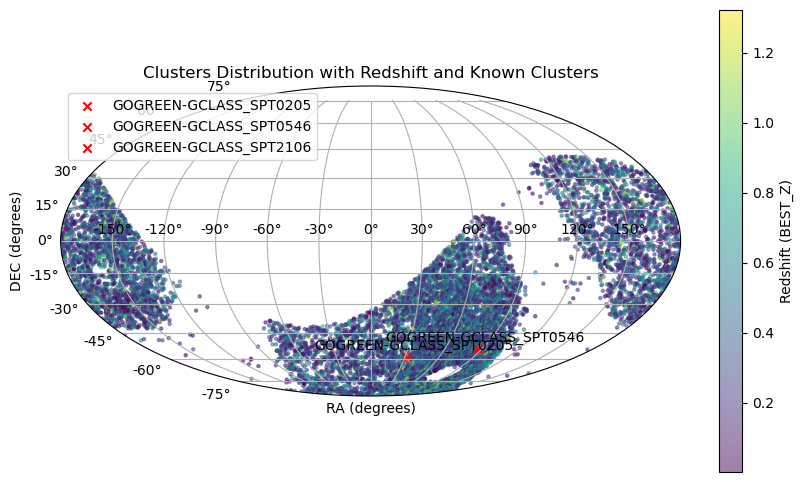

In [21]:
# Extract necessary columns
ra = data_table['RA']
dec = data_table['DEC']
redshift = data_table['BEST_Z']

# Calculate rotation angle
rotation_angle = 180 - 180

# Rotate RA coordinates
ra_mollweide = np.remainder(ra + 360 - 180 + rotation_angle, 360) - 180
ra_mollweide = np.radians(ra_mollweide)

# Create a Mollweide scatter plot with redshift information
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="mollweide")
scatter = ax.scatter(ra_mollweide, np.radians(dec), c=redshift, s=5, alpha=0.5, cmap='viridis')
ax.set_title('Clusters Distribution with Redshift and Known Clusters')
ax.set_xlabel('RA (degrees)')
ax.set_ylabel('DEC (degrees)')

# Overplot filtered data based on the boolean mask
for i in range(len(mask)):
    if mask[i]:
        label_name = match_names[i].split(',')[1].strip()
        ax.scatter(np.radians(ras[i]), np.radians(decs[i]), c='red', marker='x', label=label_name)

        # Annotate each point with its label
        ax.annotate(label_name, (np.radians(ras[i]), np.radians(decs[i])), textcoords="offset points", xytext=(5,5), ha='center')

#add colorbar for redshift
plt.colorbar(scatter, label='Redshift (BEST_Z)')
plt.grid(True)
plt.legend()
plt.savefig('mollweide_plot_with_filtered_data.png')
plt.show()

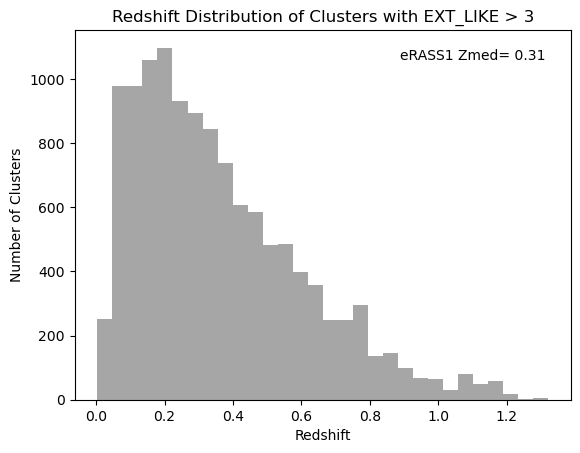

In [22]:
import matplotlib.pyplot as plt

# column EXT_LIKE
ext_like_values = data_table['EXT_LIKE']

# Filter data based on EXT_LIKE > 3
filtered_data = data_table[ext_like_values > 3]

# Create a histogram
plt.hist(filtered_data['BEST_Z'], bins=30, color='grey', alpha=0.7)
plt.xlabel('Redshift')
plt.ylabel('Number of Clusters')
plt.title('Redshift Distribution of Clusters with EXT_LIKE > 3')

# Find the median redshift in the filtered data
median_redshift = np.median(filtered_data['BEST_Z'])

# Display the median in the top right part of the graph
plt.text(0.95, 0.95, f'eRASS1 Zmed= {median_redshift:.2f}', ha='right', va='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))

plt.show()

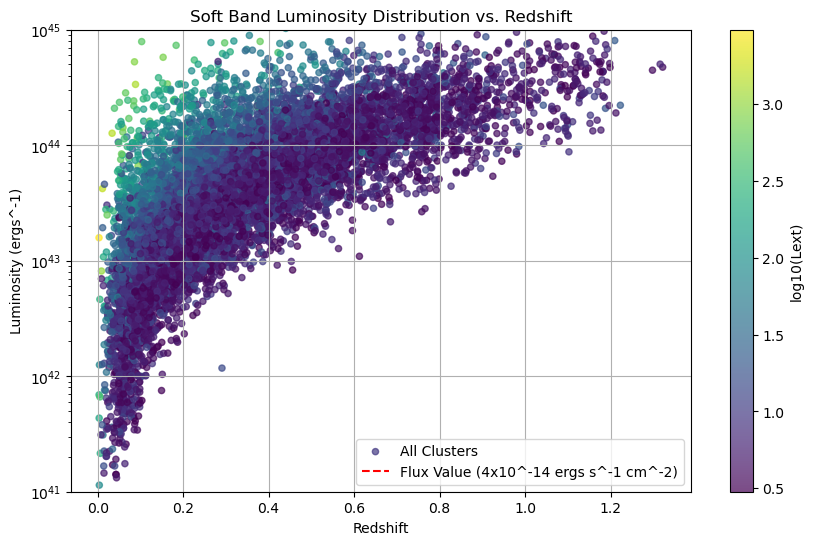

In [73]:
data_table = fits_file[1].data

Luminosity = data_table['L300kpc'] * 10**42
redshift = data_table['BEST_Z']
Lext = data_table['EXT_LIKE'] 

# Calculate the logarithm of Lext
loglext = np.log10(Lext)

# Plotting the luminosity vs. redshift
plt.figure(figsize=(10, 6))
plt.scatter(redshift, Luminosity, c=loglext, cmap='viridis', s=20, alpha=0.7, label='All Clusters')

#dashed line representing the flux value of 4 × 10^−14 ergs s^−1 cm^−2
plt.axhline(y=4e-14, color='red', linestyle='--', label='Flux Value (4x10^-14 ergs s^-1 cm^-2)')

plt.xlabel('Redshift')
plt.ylabel('Luminosity (ergs^-1)')
plt.title('Soft Band Luminosity Distribution vs. Redshift')
plt.colorbar(label='log10(Lext)')
plt.legend()
plt.grid(True)

# Set y-axis limits
plt.ylim(1e41, 1e45)

# Set y-axis ticks with logarithmic scale
plt.yscale('log')

plt.show()

C:\Users\nease\AppData\Local\Temp\ipykernel_15608\1993880892.py:8: RuntimeWarning: divide by zero encountered in log10
  logcounts = np.log10(Counts)


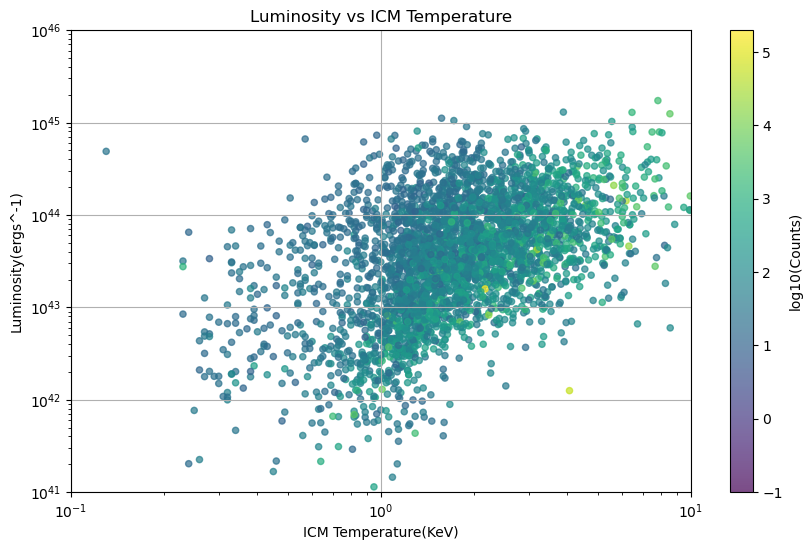

In [77]:
data_table = fits_file[1].data

Luminosity = data_table['L300kpc']*10**42
ICM_Temp = data_table['kT']
Counts = data_table['CTS500']

# Calculate the logarithm of counts
logcounts = np.log10(Counts)

# Plotting Luminosity vs ICM temperature
plt.figure(figsize=(10, 6))
plt.scatter(ICM_Temp, Luminosity, c=logcounts, cmap='viridis', s=20, alpha=0.7, label='All Clusters')
plt.xlabel('ICM Temperature(KeV)')
plt.ylabel('Luminosity(ergs^-1)')
plt.title('Luminosity vs ICM Temperature')
plt.colorbar(label='log10(Counts)')
plt.grid(True)

# Set y-axis/ x-axis limits
plt.ylim(1e41, 1e46)
plt.xlim(1e-1, 1e1)

# Set y-axis/x-axis ticks with logarithmic scale
plt.yscale('log')
plt.xscale('log')

plt.show()

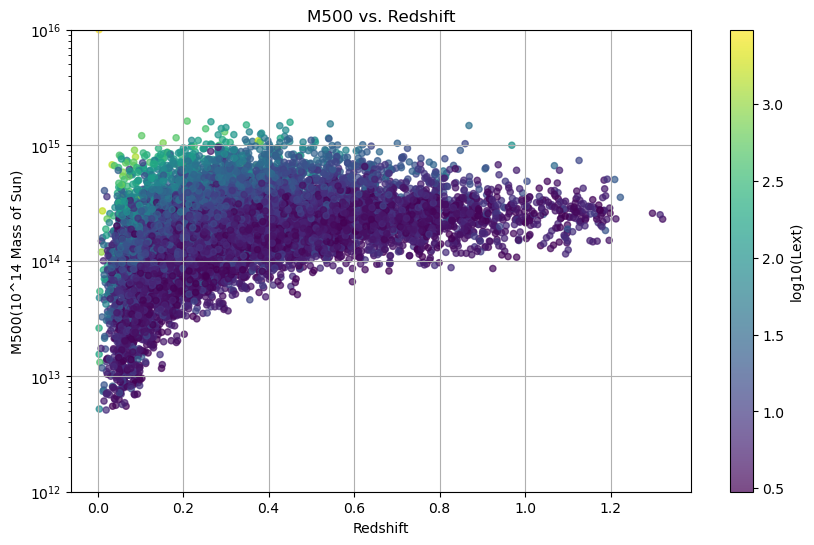

In [91]:
data_table = fits_file[1].data

# Extracting data
Mass500 = data_table['M500']*10**13
redshift = data_table['BEST_Z']
Lext = data_table['EXT_LIKE']

# Calculate the logarithm of Lext
loglext = np.log10(Lext)

# Plotting M500 vs Redshift
plt.figure(figsize=(10, 6))
plt.scatter(redshift, Mass500, c=loglext, cmap='viridis', s=20, alpha=0.7, label='All Clusters')
plt.xlabel('Redshift')
plt.ylabel('M500(10^14 Mass of Sun)')
plt.title('M500 vs. Redshift')
plt.colorbar(label='log10(Lext)')
plt.grid(True)

#Set y-limits and y-scale
plt.ylim(1e12, 1e16)
plt.yscale('log')

plt.show()

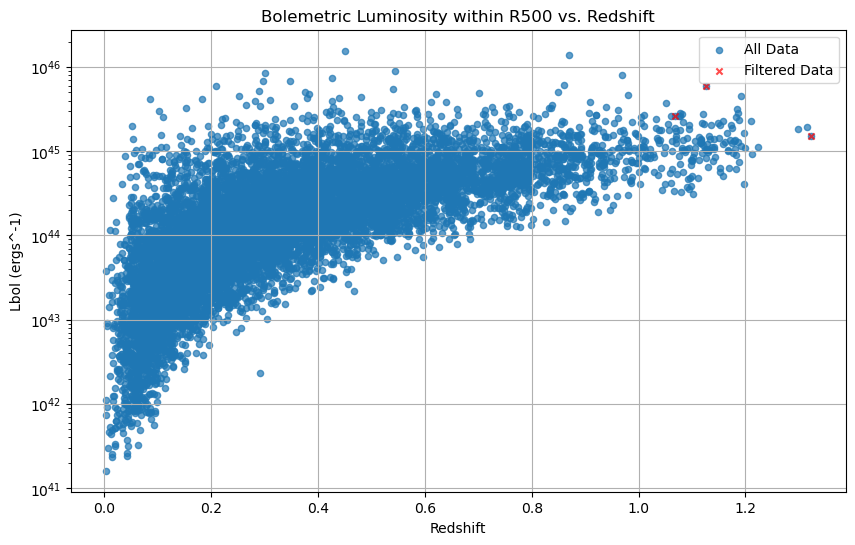

In [96]:
data_table = fits_file[1].data

# Extracting data 
Lbol = data_table['Lbol500'] * 10**42
redshift = data_table['BEST_Z']

# Plotting Lbol vs. Redshift
plt.figure(figsize=(10, 6))
plt.scatter(redshift, Lbol, s=20, alpha=0.7, label='All Data')

# Extracting data for overplotting
match_names = data_table["MATCH_NAME"]
ras = data_table["RA"]
decs = data_table["Dec"]

# Create a boolean mask to filter rows
mask = np.array(["GOGREEN-GCLASS" in name for name in match_names])

# Plot filtered data points
plt.scatter(redshift[mask], Lbol[mask], color='red', marker='x', s=20, alpha=0.7, label='Filtered Data')

# Adding labels and title
plt.xlabel('Redshift')
plt.ylabel('Lbol (ergs^-1)')
plt.title('Bolemetric Luminosity within R500 vs. Redshift')
plt.grid(True)
plt.yscale('log')
plt.legend()

plt.show()